<a href="https://colab.research.google.com/github/chandragupta07/STUDENT_PERFORMANCE_PREDITICTION/blob/main/STUDENT_PERFPORMANCE_PREDITICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
#loading the dataset
df = pd.read_csv('/content/Student_Performance.csv')

In [6]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [7]:
df.shape

(10000, 6)

In [8]:

df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:

y = df['Performance Index']

In [10]:
y


0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [11]:
x = df.drop(['Performance Index'], axis= 1)

In [12]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [13]:
x['Extracurricular Activities'] = x['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [14]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [15]:
columns = x.columns

In [16]:
columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [17]:
scaler = StandardScaler()

In [18]:

x = scaler.fit_transform(x)

In [19]:
x

array([[ 0.77518771,  1.70417565,  1.01045465,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -0.98965352, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  1.01045465,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  1.01045465,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  1.01045465,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245, -0.98965352,  0.86650484, -1.24975394]])

In [20]:

x =pd.DataFrame(x, columns=columns)

In [21]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333
...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982
9996,0.775188,-0.314013,1.010455,0.866505,0.145333
9997,0.388965,0.781575,1.010455,0.866505,0.145333
9998,1.547633,1.588851,1.010455,0.276805,-1.598526


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [23]:
x_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9145,-1.155926,-0.141025,-0.989654,0.866505,-0.203439
5777,0.002742,-0.025700,-0.989654,0.276805,0.494105
4429,0.388965,0.262612,-0.989654,0.276805,-1.598526
3241,-0.383481,1.531188,-0.989654,0.276805,-0.552210
3468,0.775188,1.069888,1.010455,-0.312895,-1.598526
...,...,...,...,...,...
7773,1.547633,0.723913,-0.989654,1.456205,-0.203439
7766,0.775188,0.608588,1.010455,-1.492294,1.540420
750,-0.769703,-0.890638,-0.989654,-0.902594,0.145333
7186,1.547633,-0.775313,1.010455,0.276805,-0.203439


In [24]:
y_train

9145    50.0
5777    57.0
4429    60.0
3241    80.0
3468    77.0
        ... 
7773    80.0
7766    75.0
750     34.0
7186    51.0
9881    52.0
Name: Performance Index, Length: 8000, dtype: float64

In [25]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
5127,1.161410,0.896900,1.010455,-1.492294,0.842877
8465,0.775188,0.839238,-0.989654,0.276805,1.540420
2621,0.388965,0.204950,-0.989654,1.456205,0.145333
463,-0.769703,0.377938,1.010455,-0.902594,0.494105
4974,0.775188,-0.890638,1.010455,-0.312895,-1.249754
...,...,...,...,...,...
6760,-1.155926,0.954563,-0.989654,-0.902594,-0.900982
805,-1.155926,-1.294276,-0.989654,0.866505,0.494105
6674,-0.769703,-0.487000,1.010455,0.866505,0.494105
4018,0.002742,0.204950,1.010455,1.456205,-0.552210


In [26]:
y_test

5127    80.0
8465    76.0
2621    65.0
463     55.0
4974    41.0
        ... 
6760    65.0
805     28.0
6674    42.0
4018    60.0
4136    60.0
Name: Performance Index, Length: 2000, dtype: float64

In [27]:

lr = LinearRegression()

In [28]:
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
predictions = lr.predict(x_test)

In [30]:
predictions

array([79.22055523, 76.49972707, 62.62792496, ..., 42.23879669,
       60.0617953 , 61.15888135])

In [31]:

mse_test = mean_squared_error(y_test, predictions)

In [32]:
mse_test

4.214114319179262

In [33]:
predictions_train = lr.predict(x_train)

In [34]:
mse_train = mean_squared_error(y_train, predictions_train)

In [35]:
mse_train

4.137825243397912

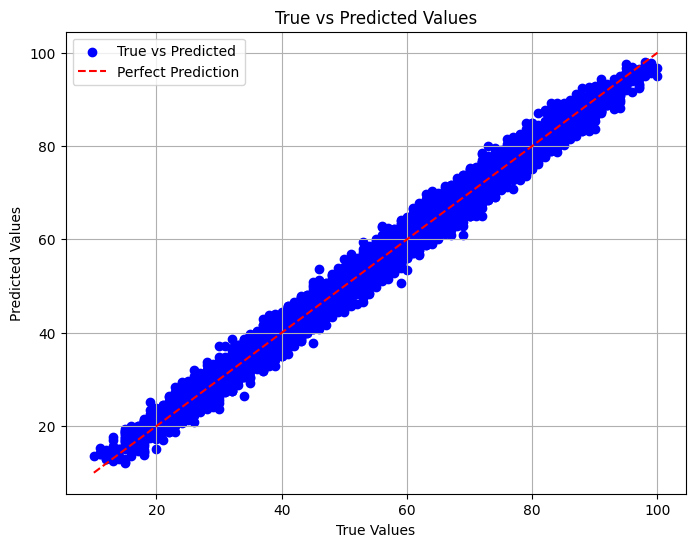

In [36]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, c='blue', label='True vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

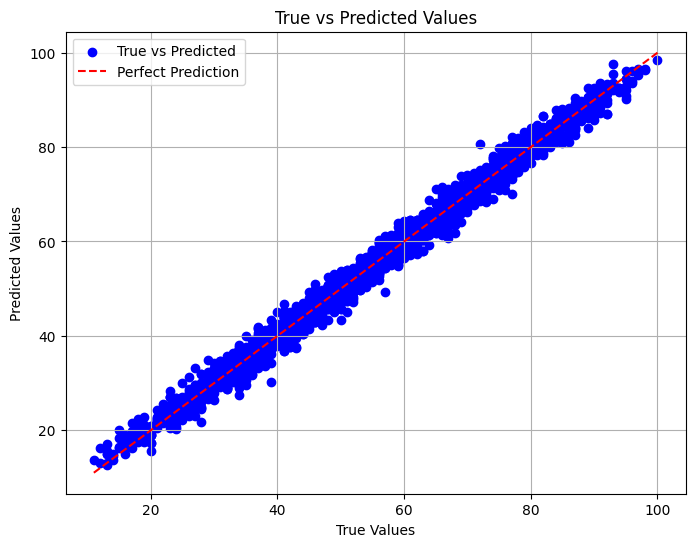

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, c='blue', label='True vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
new_input = [[6,70,0,12,5]]

In [39]:
new_input = scaler.transform(new_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
new_input

array([[ 0.38896495,  0.03196234, -0.98965352,  3.22530391,  0.1453332 ]])

In [41]:
new_input.shape

(1, 5)

In [42]:
predictions_new = lr.predict(new_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:

predictions_new

array([60.98919309])